<a href="https://colab.research.google.com/github/blackJJW/ML/blob/main/self_study_ML/chapter6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Book : '혼자 공부하는 머신러닝 + 딥러닝', 박해선 지음, 한빛미디어

# 06-3 주성분 분석

## 차원과 차원 축소

- 데이터가 가진 속성을 특성.
  - ex) 과일 사진의 경우 10,000개의 픽셀이 있기 때문에 10,000개의 특성이 재.
  - 머신러닝에서는 이런 특성을 차원(dimension)
- 차원을 줄일 수 잇따면 저장 공간을 크게 줄일 수 있음.

- 차원 축소(dimensionality reduction) 알고리즘 : 비지도 학습 작업 중 하나.
  - 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법
- 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원 가능.

- 주성분 분석(PCA; principal component analysis)

## 주성분 분석 소개

- PCA은 데이터에 있는 분산이 큰 방향을 찾는 것으로 이해 가능.
- 분산은 데이터가 널리 퍼져있는 정도.


- 주성분(principal component) 벡터 : 원본 데이터에 있는 어떤 방향.
  - 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같음.
  - 주성분은 원본 차원과 같고 주성분로 바꾼 데이터는 차원이 줄어듦.
  - 주성분이 가장 분산이 큰 방향이기 때문에 주성분에 투영하여 바꾼 데이터는 원본이 가지고 있는 특성을 가장 잘 나타냄.

- 첫 번째 주성분을 찾은 다음 이 벡터에 수직이고 분산이 가장 큰 다음 방향을 찾음. -> 이 벡터가 두 번째 주성분.
- 일반적으로 주성분은 원본 특성의 개수만큼 찾을 수 있음. 

## PCA 클래스

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2022-04-18 05:46:37--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-04-18 05:46:38--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-04-18 05:46:38--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conne

- PCA 클래스의 객체를 만들 때 n_components 매개변수에 주성분의 개수 지정

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

- PCA가 찾은 주성분은 components_ 속성에 저장

In [4]:
print(pca.components_.shape)

(50, 10000)


In [6]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
  n = len(arr) # 샘플의 개수
  # 한 줄에 10개씩 이미지를 그림.
  # 샘플 개수를 10으로 나누어 전체 행 개수를 계산
  rows = int(np.ceil(n/10))
  # 행이 1개이면 열의 개수는 샘플 개수. 그렇지 않으면 10개
  cols = n if rows < 2 else 10
  
  fig, axs = plt.subplots(rows, cols,
                          figsize=(cols*ratio, rows*ratio), squeeze=False)
  
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n: # n 개까지 그림.
        axs[i, j].imshow(arr[i*10+j], cmap='gray_r')
      axs[i, j].axis('off')
  plt.show()

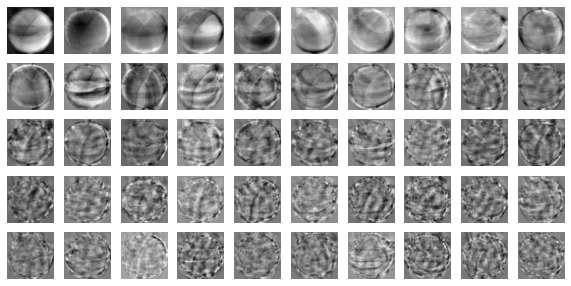

In [7]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [8]:
print(fruits_2d.shape)

(300, 10000)


In [9]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


- transform() 사용해 원본 데이터의 차원을 50으로 줄임.

## 원본 데이터 재구성

- 원본 데이터 재구성 -> inverse_transform()

In [10]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


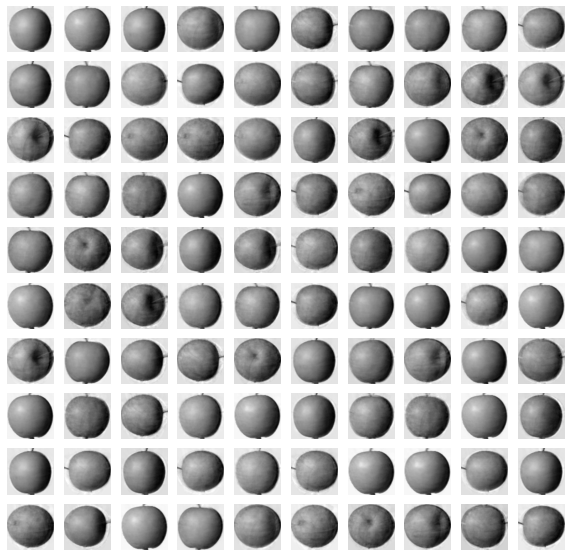

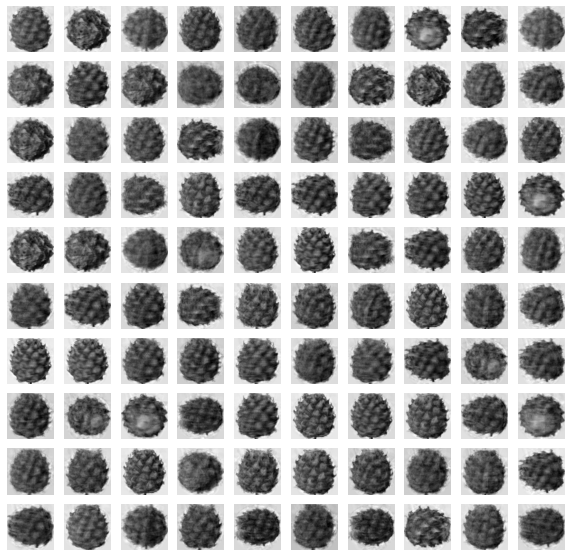

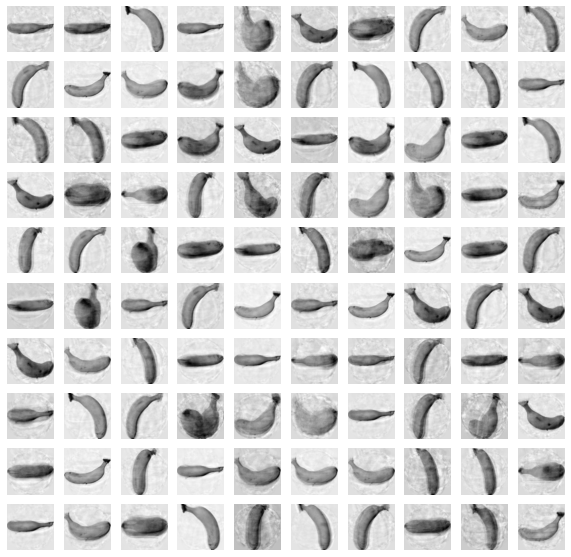

In [11]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

## 설명된 분산

- 설명된 분산(explained variance) : 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는 지 기록한 값.
- explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록.
  - 첫 번째 주성분의 분산이 가장 큼
  - 분산 비율을 모두 더하면 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있음.

In [12]:
print(np.sum(pca.explained_variance_ratio_))

0.9215160000715822


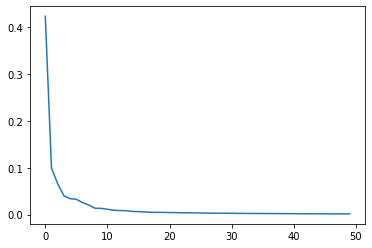

In [13]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

- 처음 10개의 주성분이 대부분의 분산을 표현하고 있음.
- 그다음부터는 각 주성분이 설명하고 있는 분산으 비교적 작음.

## 다른 알고리즘과 함깨 사용

- 로지스틱 회귀 모델 사용

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

- 지도 학습 모델을 사용하려면 타깃값이 필요.
- 사과 : 0, 파인애플 : 1, 바나나 : 2

In [17]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [18]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.642810297012329


- PCA로 축소한 fruits_pca

In [19]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.07350859642028809


- PCA 클래스는 지정된 비율에 도달할 때까지 자졷으로 주성분을 찾음.

In [20]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [21]:
print(pca.n_components_)

2


- 2개의 특성으로 원본 데이터에 있는 분산의 50%를 표현할 수 있음.

- 이 모델로 원본 데이터를 변환.

In [22]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [23]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9933333333333334
0.060103750228881835


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


- 차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터를 찾음.

In [24]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state =42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


- KMeans가 찾은 레이블을 사용해 과일 이미지 출력

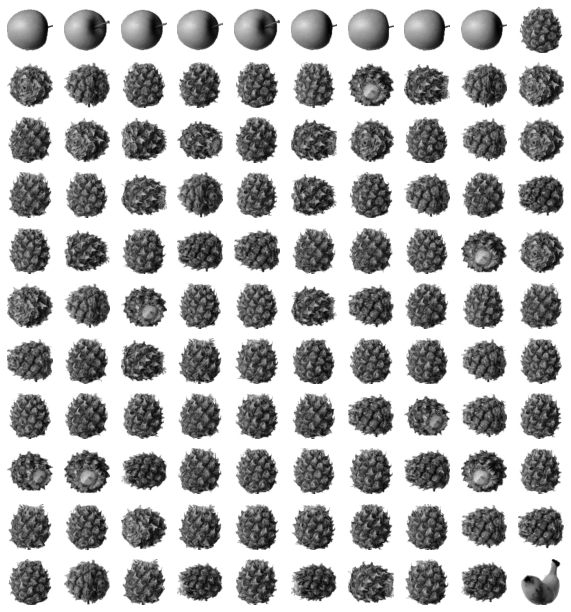

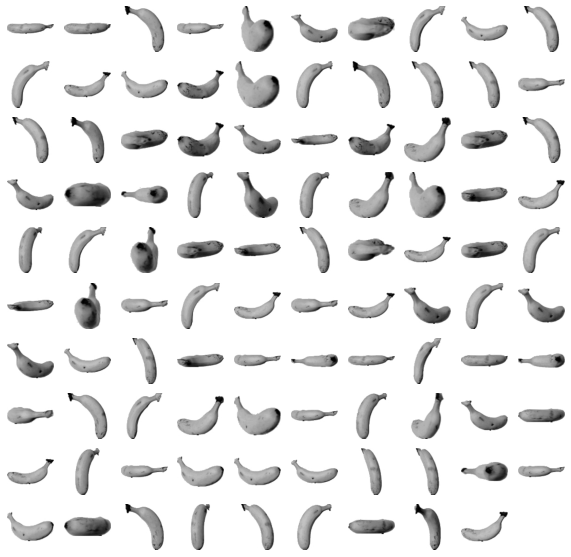

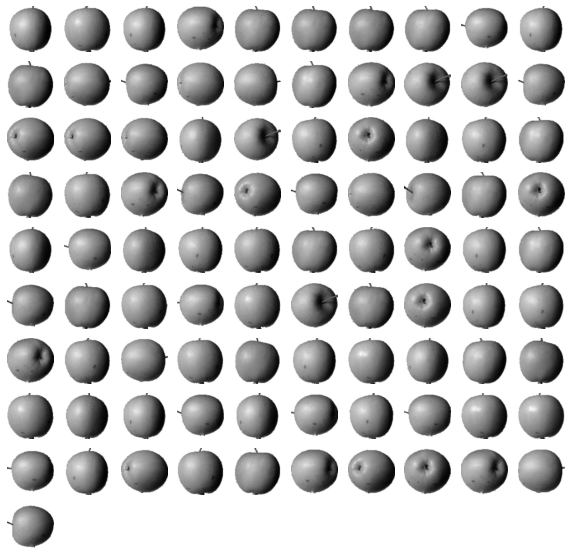

In [25]:
for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])
  print('\n')

- 훈련 데이터의 차원을 줄이면 얻을 수 있는 장점 : 시각화
  - 3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉬움.

- km.labels_를 사용해 클러스터별로 나누어 산점도를 그림

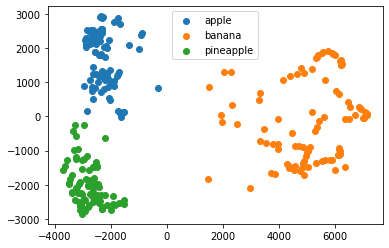

In [27]:
for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

## 마무리

### 키워드로 끝내는 핵심 포인트

- 차원 축소 : 원본 데이터의 특성을 적은 수의 새로운 특성으로 변환하느 비지도 학습의 한 종류.
  - 저장 공간을 줄이고 시각화 하기 쉬움.
  - 다른 알고리즘의 성능을 높일 수 있음.
- 주성분 분석 : 차원 축소 알고리즘의 하나로 데이터에서 가장 분산이 큰 방향을 찾는 방법.
  - 이런 방향을 주성분이라 부름
  - 원본 데이터를 주성분에 투영하여 새로운 특성을 만들 수 있음.
  - 일반적으로 주성분은 원본 데이터에 있는 특성 개수보다 작음
- 설명된 분산 : 주성분 분석에서 주성분이 얼마나 원본 데이터의 분산을 잘 나타내는지 기록한 것.
  - 사이킷런의 PCA 클래스는 주성분 개수나 설명된 분산의 비율을 지정하여 주성분 분석을 수행할 수 있음.

### 핵심 패키지와 함수

> scikit-learn
- PCA : 주성분 분석을 수행하는 클래스.
  - n_components : 주성분의 개수를 지정.
    - 기본값 = None
    - 샘플 개수와 특성 개수 중에 작은 것의 값을 사용.
  - random_state : 넘파이 난수 시드 값을 지정 가능
  - components_ : 훈련 세트에서 찾은 주성분이 저장
  - explained_variance_ : 설명된 분산이 저장
    - explained_variance_ratio_ : 설명된 분산의 비율이 저장
  - inverse_transform() : transform() 메서드로 차원을 축소시킨 데이터를 다시 원본 차원으로 복원.